# A Brief Introduction to Combinatorics in Sage Math

This document aims to give a crash-course to certain combinatorial features in Sage. This document is meant to follow the notebook *A Brief Introduction to Sage Math*, [**available by clicking here**](https://cocalc.com/share/fe9ac09a79594e2da847e5804207254290bffac2/Public%20Code/Notebook%201%20-%20An%20Introduction%20to%20Sage.ipynb?viewer=share).

To execute a piece of Sage code, click on the Input section of the corresponding code cell and hit Shift + Enter (only hitting Enter simply adds a new line). The reader should execute each statement as they work through the notebook, and is encouraged to modify the code and play around as they go. Note that skipping a cell may result in errors when later cells are executed (for instance, if one skips a code block defining a variable and later tries to run code calling that variable). There are a selection of short exercises throughout, and a few larger exercises in the final section. To add a new cell, click to the left of any cell and press the "a" key. To delete a cell, click to the left of a cell and press the "d" key. These (and other) tasks can also be accomplished through the menu bars at the top of the page.

Further information about the combinatorics capabilities of Sage can be found in the [**official documentation**](https://doc.sagemath.org/html/en/reference/combinat/index.html) or Part 4 of the open textbook [**Computational Mathematics with SageMath**](http://sagebook.gforge.inria.fr/english.html).

## 1. Basic Combinatorial Objects and Operations

We begin by discussing a selection of combinatorial objects that can be represented and manipulated in Sage. The point is not to give an exhaustive list of all combinatorial objects in Sage; rather, we simply show that many objects of interest to combinatorialists have already been implemented. Hopefully, the user will be inspired to look further into the vast selection of available options (and maybe even add more).

##### Subsets and Combinations

In [1]:
# First, we look at set operations: the cartesian_product procedure can be used to create a set of pairs
# Here we create a deck of cards and draw a random element
Suits = Set(["Clubs", "Spades", "Hearts", "Diamonds"])
Values = Set([2, 3, 4, 5, 6, 7, 8, 9, 10,"Jack", "Queen", "King", "Ace"])
Cards = cartesian_product([Values, Suits])
print(Cards.random_element())

(5, 'Hearts')


In [2]:
# Now we create the set of all possible 5 card hands
Hands = Subsets(Cards, 5)
print(Hands.random_element()) # Print a random hand
print(Hands.cardinality()) # There are binomial(52,5) possible 5 card hands
print(binomial(52,5))

{(9, 'Spades'), (2, 'Diamonds'), ('Ace', 'Spades'), (3, 'Hearts'), ('Jack', 'Spades')}
2598960
2598960


In [3]:
##########################################################################
# EXERCISE: Define a function which takes a positive integer n and returns
# all possible rolls of n dice (each die has sides 1,2,...,6).
##########################################################################


In [4]:
#################################################################
# EXERCISE: Plot the distribution obtained by rolling 2 dice and
# recording the sum, repeated 1000 times.
#################################################################


In [5]:
# The Combinations(M,k) function returns all k-subsets of a (multi)set M,
# where each element appears at most as many times as it appears in M
print(Combinations([1,2,3],2).list())

[[1, 2], [1, 3], [2, 3]]


In [6]:
# Lists and strings can also be taken as input
print(Combinations("mississippi",2).list())

[['m', 'i'], ['m', 's'], ['m', 'p'], ['i', 'i'], ['i', 's'], ['i', 'p'], ['s', 's'], ['s', 'p'], ['p', 'p']]


#### Permutations
Additional details on permutations in Sage can be found [**here**](https://doc.sagemath.org/html/en/reference/combinat/sage/combinat/permutation.html#sage-combinat-permutation).

In [7]:
# One of the most fundamental objects in combinatorics is the class of permutations of a set
# Arrangements(M,k) returns all k element permutations of a multiset M
Arrangements(["A","K","Q","J"],2).list()

[['A', 'K'],
 ['A', 'Q'],
 ['A', 'J'],
 ['K', 'A'],
 ['K', 'Q'],
 ['K', 'J'],
 ['Q', 'A'],
 ['Q', 'K'],
 ['Q', 'J'],
 ['J', 'A'],
 ['J', 'K'],
 ['J', 'Q']]

In [8]:
# The Permutations(k) function constructs the class of permutations on the set {1,2,...,k}
P = Permutations(3)
print("The class [{}] is composed of {}".format(P,P.list()))

The class [Standard permutations of 3] is composed of [[1, 2, 3], [1, 3, 2], [2, 1, 3], [2, 3, 1], [3, 1, 2], [3, 2, 1]]


In [9]:
# There are many functions on permutations built-in to Sage
# A list can be cast to a permutation (when possible)
ptest = Permutation([2,3,4,1])
ptest.longest_increasing_subsequences()

[[2, 3, 4]]

In [10]:
# Permutations can also be entered in cycle notation
Permutation('(1,2)(3,4,5)')

[2, 1, 4, 5, 3]

In [11]:
# Note that Permutation objects are different than elements of the Permutation Group
p = Permutation([2,1,3])
print(type(p))
g = PermutationGroupElement([2,1,3])
print(type(g))

<class 'sage.combinat.permutation.StandardPermutations_all_with_category.element_class'>
<class 'sage.groups.perm_gps.permgroup_element.SymmetricGroupElement'>


In [12]:
# Some types of Permutations have their own classes or constructors
D = Derangements(3)
print("The elements of ({}) are {}. These elements lie in {}.".format(D,D.list(),type(D[0])))

The elements of (Derangements of the set [1, 2, 3]) are [[2, 3, 1], [3, 1, 2]]. These elements lie in <class 'sage.combinat.derangements.Derangements_with_category.element_class'>.


In [13]:
B = BaxterPermutations(3)
print("The elements of ({}) are {}. These elements lie in {}.".format(B,B.list(),type(B[0])))

The elements of (Baxter permutations of size 3) are [[3, 2, 1], [2, 3, 1], [2, 1, 3], [1, 3, 2], [3, 1, 2], [1, 2, 3]]. These elements lie in <class 'sage.combinat.permutation.StandardPermutations_n_with_category.element_class'>.


##### Integer Partitions
Additional details on integer partitions in Sage can be found [**here**](https://doc.sagemath.org/html/en/reference/combinat/sage/combinat/partition.html).

In [14]:
# Recall that a partition of a positive integer n is the set of weakly-decreasing
# tuples of positive integers summing to n. Integer partitions have their own class
P = Partitions(10)
print("The class [{}] has {} elements".format(P,P.cardinality()))
print("A random element of [{}] is {}".format(P,P.random_element()))
print("This element lies in {}".format(type(P.random_element())))

The class [Partitions of the integer 10] has 42 elements
A random element of [Partitions of the integer 10] is [2, 2, 2, 2, 1, 1]
This element lies in <class 'sage.combinat.partition.Partitions_n_with_category.element_class'>


In [15]:
# Partitions can be displayed graphically by their Ferrers diagram
# (note the command for Young tableaux currently has some printing errors)
p = P.random_element()
print(p)
print(p.ferrers_diagram())

[2, 2, 2, 1, 1, 1, 1]
**
**
**
*
*
*
*


In [16]:
# The conjugate of a partition P is the partition whose diagram has the rows and columns of P switched
pcon = p.conjugate()
print(pcon)
print(pcon.ferrers_diagram())

[7, 3]
*******
***


In [17]:
# We can impose various constraints on the partitions
# Here we count partitions of 20 whose diagram lies in a 10 x 5 square
Pbox = Partitions(20, max_part=10, max_length=5)
print("The class [{}] has {} elements".format(Pbox,Pbox.cardinality()))
print("A random element in this class is {}".format(Pbox.random_element()))

The class [Partitions of the integer 20 satisfying constraints max_length=5, max_part=10] has 121 elements
A random element in this class is [9, 8, 3]


In [18]:
# Integer compositions (like partitions but not needing to be in decreasing order) also have a class
Compositions(10).random_element()

[2, 2, 3, 1, 1, 1]

##### Set Partitions
Additional details on set partitions in Sage can be found [**here**](https://doc.sagemath.org/html/en/reference/combinat/sage/combinat/set_partition.html).

In [19]:
# Set partitions are another basic combinatorial object
S = SetPartitions(3)
print("The {} are {}. They lie in {}.".format(S,S.list(),type(S[0])))

The Set partitions of {1, 2, 3} are [{{1, 2, 3}}, {{1, 2}, {3}}, {{1, 3}, {2}}, {{1}, {2, 3}}, {{1}, {2}, {3}}]. They lie in <class 'sage.combinat.set_partition.SetPartitions_set_with_category.element_class'>.


In [20]:
print("A random set partition of size 20 is {}".format(SetPartitions(20).random_element()))

A random set partition of size 20 is {{1, 14, 16}, {2, 11}, {3, 7}, {4, 10}, {5}, {6}, {8, 15, 17}, {9, 12, 13, 18, 20}, {19}}


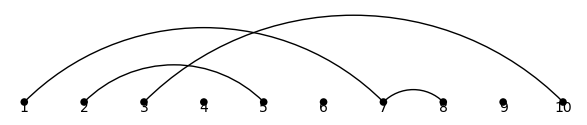

This partition has crossings at [((1, 7), (3, 10)), ((2, 5), (3, 10))]


In [21]:
# Set partitions can be displayed graphically as crossing diagrams
sp = SetPartitions(10).random_element()
show(sp.plot())
print("This partition has crossings at {}".format(sp.crossings()))

##### Alternating Sign Matrices
Additional details on ASMs in Sage can be found [**here**](https://doc.sagemath.org/html/en/reference/combinat/sage/combinat/alternating_sign_matrix.html).

In [22]:
# An Alternating Sign Matrix (ASM) of size n is an n-by-n matrix 
# with 0,1,-1 entries such that the sum of each row and column is 1 and
# the non-zero entries in each row/column alternate in sign
A = AlternatingSignMatrices(7)
print("There are {} {}".format(A.cardinality(),A))

There are 218348 Alternating sign matrices of size 7


In [23]:
show(A.random_element())

[ 0  1  0  0  0  0  0]
[ 0  0  0  1  0  0  0]
[ 1 -1  0  0  0  0  1]
[ 0  0  1 -1  1  0  0]
[ 0  0  0  1  0  0  0]
[ 0  1  0  0 -1  1  0]
[ 0  0  0  0  1  0  0]

In [24]:
# Much attention is given to these objects because of connections to physics
a = AlternatingSignMatrices(3).random_element()
print(a.to_six_vertex_model())

    ^    ^    ^  
    |    |    |  
--> # -> # -> # <--
    ^    ^    |  
    |    |    V  
--> # <- # <- # <--
    |    ^    |  
    V    |    V  
--> # -> # <- # <--
    |    |    |  
    V    V    V  


#### Graph Theory
Additional details on Graph Theory in Sage can be found [**here**](https://doc.sagemath.org/html/en/reference/graphs/index.html#sage-graphs).

In [25]:
# Explicitly constructing a graph from edges and vertices
g = Graph()
g.add_vertices(range(5))
g.add_edges([(0,k) for k in range(1,5)])

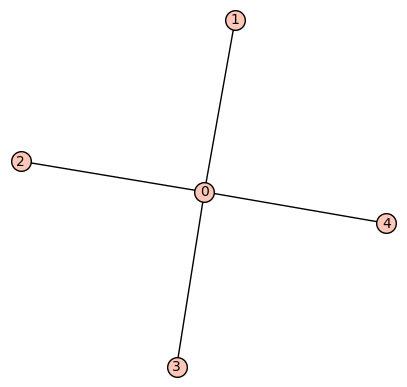

In [26]:
show(g.plot())

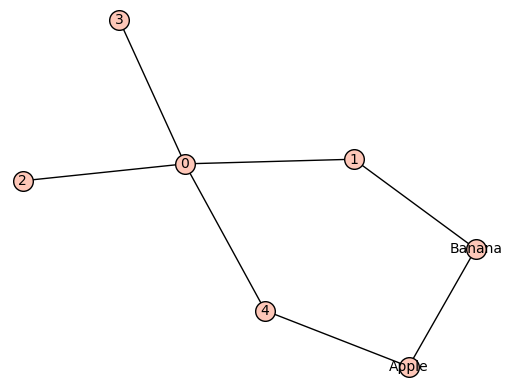

Is this graph planar: True


In [27]:
# Edges to vertices not already appearing are automatically added
# Labels can be more than just numbers
g.add_edges([(4,"Apple"),("Banana",1),("Apple","Banana")])
show(g.plot())
print("Is this graph planar: {}".format(g.is_planar()))

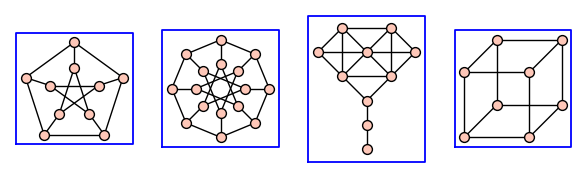

In [28]:
# Some famous graphs are built in
show(graphs.PetersenGraph(),graphs.MoebiusKantorGraph(),graphs.KrackhardtKiteGraph(),graphs.HexahedralGraph())

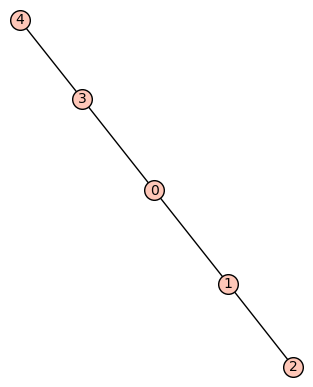

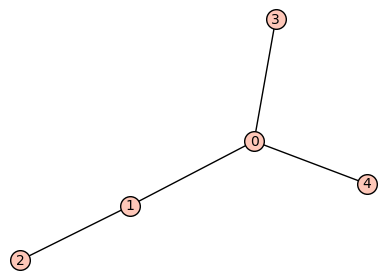

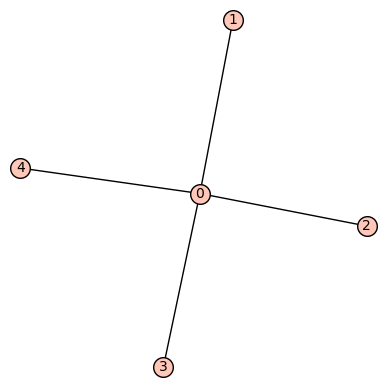

In [29]:
# Iteratate over the set of trees with n nodes
for k in graphs.trees(5): 
    show(k)

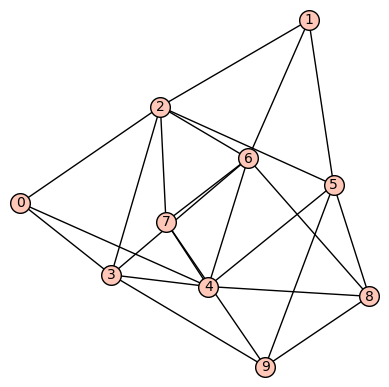

In [30]:
# Plot a random graph in G(n,p)
g = graphs.RandomGNP(10,1/2)
g.plot()

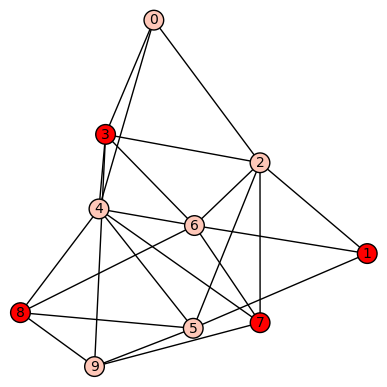

In [31]:
# Additional information can be added visually to plots
# Here we colour a maximum independent set
g.show(partition = [g.independent_set()])

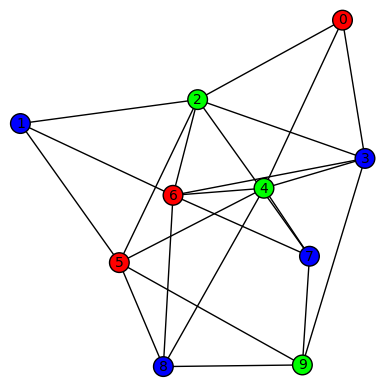

In [32]:
# Now we plot a proper vertex colouring with minimal number of colours
g.show(vertex_colors = g.coloring(hex_colors = True))

## 2. Generating Functions and Combinatorial Species
Next, we examine methods for setting up and solving functional equations for the generating functions of combinatorial classes. Recall that the *generating function* of a sequence $(c_n)$ of real numbers is the (formal) power series 
$$ C(z) = \sum_{n \geq 0} c_nz^n.$$
Given a collection of objects of various sizes (for instance, the class of permutations on $n$ letters, or the number of binary trees on $n$ nodes) the generating function of the class is the formal series whose coefficient of $z^n$ is the number of objects in the collection with size $n$.

Additional details on the Sage methods discussed in this section can be found [**here**](https://doc.sagemath.org/html/en/reference/combinat/sage/combinat/species/__init__.html). Additional details on the generating functions constructed here can be found in Chapter One of [**Analytic Combinatorics by Flajolet and Sedgewick**](http://ac.cs.princeton.edu/home/). Additional details on species theory can be found in [**these notes of Bergeron**](http://bergeron.math.uqam.ca/wp-content/uploads/2013/11/book.pdf).

In [33]:
# First, import the necessary methods into Sage
from sage.combinat.species.library import *

In [34]:
# Species Theory describes complicated combinatorial classes recursively 
# The two most basic classes are the singleton and EmptySet species, which
# have a single element of size 1 and a single element of size 0, respectively
Z = SingletonSpecies()
Eps = EmptySetSpecies()
print(Z)
print(Eps)

Singleton species
Empty set species


In [35]:
# The (initial terms of the) generating function of a class can be computed
Zgf = Z.generating_series()
Egf = Eps.generating_series()
print("The generating functions of [{}] and [{}] are {} and {}, respectively".format(Z,Eps,Zgf,Egf))
print("The GFs lie in {}".format(type(Zgf)))

The generating functions of [Singleton species] and [Empty set species] are 1*x and 1, respectively
The GFs lie in <class 'sage.combinat.species.generating_series.ExponentialGeneratingSeries'>


In [36]:
# More complicated objects can be built out of these objects and other constructions.
# For instance, a Dyck path is a sequence of n North steps and n East steps which start
# at (0,0) and end at (n,n) and always stay on or above the line y = x.
# A Dyck path is either empty or can be decomposed as a north step, 
# a Dyck path, an East step, and another Dyck path. This gives the definition
DP = CombinatorialSpecies()
North = SingletonSpecies()
East = SingletonSpecies()
Eps =  EmptySetSpecies()
DP.define( Eps + North*DP*East*DP )

In [37]:
# Again we can calculate the generating series
# NOTE: Sage enumerates LABELED objects (each singleton has a unique label) and
# computes the EXPONENTIAL generating function. In this example this is the same as the
# ordinary generating function for unlabelled objects
print(DP.generating_series())

Uninitialized lazy power series


In [38]:
# The isotype generating function is the ordinary generating function counting
# the number of isomorphism types. This is returned as a lazy power series.
# Again, for Dyck paths this is the ordinary counting generating function.
isoGF = DP.isotype_generating_series()
print(isoGF.coefficients(20))

[1, 0, 1, 0, 2, 0, 5, 0, 14, 0, 42, 0, 132, 0, 429, 0, 1430, 0, 4862, 0]


In [39]:
# The number of Dyck paths on 2n steps is the nth Catalan number
[binomial(2*n,n)/(n+1) for n in range(10)]

[1, 1, 2, 5, 14, 42, 132, 429, 1430, 4862]

In [40]:
# This can also be determined by solving a function equation using lazy power series in Sage
L.<z> = LazyPowerSeriesRing(QQ)
C = L()
C._name = 'C'
C.define( 1 + z^2 * C * C )
[C.coefficient(i) for i in range(20)]

[1, 0, 1, 0, 2, 0, 5, 0, 14, 0, 42, 0, 132, 0, 429, 0, 1430, 0, 4862, 0]

In [41]:
#################################################################
# EXERCISE: Create a functional equation for the number of {0,1}-strings
# that do not have two consecutive 1s. Find the first 20 terms of the
# ordinary generating function. Explicitly find the generating function
# in closed form.
#################################################################


In [42]:
#################################################################
# EXERCISE: A rooted planar binary tree is either empty or a node
# followed by two ordered children binary trees. Find the first 20
# terms of the ordinary generating function.
#################################################################


In [43]:
# There are several other constructions built-in to Sage
# For instance, a permutation can be viewed as a labeled set of cycles
E = species.SetSpecies()
C = species.CycleSpecies()
Perm = E(C)

In [44]:
# There are n! permutations of size n, so the exponential generating function has all coeffs = 1
Perm.generating_series().coefficients(10)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [45]:
# The number of non-isomorphic objects of size n is given by the number of partitions of n
# (which specify the number of elements in each disjoint cycle)
Perm.isotype_generating_series().coefficients(10)

[1, 1, 2, 3, 5, 7, 11, 15, 22, 30]

In [46]:
# Some common species are prebuilt using basic constructions
S = species.SimpleGraphSpecies()
print(S)
CFs = S.generating_series().coefficients(10)
[factorial(k)*CFs[k] for k in range(10)] # Number of labeled graphs is 2^binomial(n,2)

Functorial composition of (Subset species) and (Product of (Set species with min=2, max=3) and (Set species))


[1, 1, 2, 8, 64, 1024, 32768, 2097152, 268435456, 68719476736]

## 3.Rational and D-finite Generating Functions
Finally, we look at two classes of generating functions, and see how they provide data structures for combinatorial sequences.

#### C-Finite Sequences and Rational Functions
A sequence $(a_n)$ is *C-finite* over the rational numbers if it satisfies a linear recurrence of the form
$$ a_{n+r} = c_{r-1} a_{n+r-1} + \cdots + c_0 a_n \qquad (n \geq 0)$$
for some $r\in\mathbb{N}$ and constants $c_0,\dots,c_{r-1} \in \mathbb{Q}$. It is well known that a sequence $(a_n)$ of rational numbers is C-finite if and only if its generating function $F(z) = \sum_{n \geq 0} a_nz^n$ is the power series expansion of a rational function (ratio of polynomials with integer coefficients) at the origin.  

In [47]:
##########################################################################################
# EXERCISE: Prove that a_n is C-finite if and only if its generating function is rational
##########################################################################################

In [48]:
# Sage implements the ring of C-Finite sequences. One can imagine a recurrence and initial terms
# (or the corresponding rational GF) as providing an encoding of the sequence
C.<x> = CFiniteSequences(QQ)
print(C)

The ring of C-Finite sequences in x over Rational Field


In [49]:
# C-finite sequences can be defined by their recurrence and initial conditions
# (run C.from_recurrence? to see the format for the input)
fib = C.from_recurrence([1,1],[1,1]) # Recurrence a_{n+2} = a_{n+1} + a_n with a_0 = a_1 = 1
print(fib)
print(fib.parent())

C-finite sequence, generated by -1/(x^2 + x - 1)
The ring of C-Finite sequences in x over Rational Field


In [50]:
# C-finite sequences can also be defined by their rational generating function
fib2 = C('1/(1-x-x^2)')
print(fib2)
print(fib==fib2)

C-finite sequence, generated by -1/(x^2 + x - 1)
True


In [51]:
# Power series truncation can be computed automatically
fib.series(10)

1 + x + 2*x^2 + 3*x^3 + 5*x^4 + 8*x^5 + 13*x^6 + 21*x^7 + 34*x^8 + 55*x^9 + O(x^10)

In [52]:
# Coefficients can be accessed in a natural way
print([fib[k] for k in range(10)])
print(fib[1000])

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55]
70330367711422815821835254877183549770181269836358732742604905087154537118196933579742249494562611733487750449241765991088186363265450223647106012053374121273867339111198139373125598767690091902245245323403501


In [53]:
# Any C-finite sequence can be written as a finite sum of explicit terms involving
# algebraic numbers. Here is the nth Fibonacci number:
show(fib.closed_form())

1/2*(1/2*sqrt(5) + 1/2)^n*(sqrt(1/5) + 1) - 1/2*(-1/2*sqrt(5) + 1/2)^n*(sqrt(1/5) - 1)

In [54]:
# In general, the result cannot contain numbers explicitly defined with radicals
# Sage's usual way of handling algebraic numbers then appears
show( C(1/(1-x-x^2-x^5)).closed_form() )

0.6166275139556477?*1.704902776041646?^n + (0.05380265792086830? - 0.09461946035179473?*I)*(0.4285384205655347? + 0.710200650526218?*I)^n + (0.05380265792086830? + 0.09461946035179473?*I)*(0.4285384205655347? - 0.710200650526218?*I)^n + (0.1378835851013079? + 0.01667956381901742?*I)*(-0.780989808586358? + 0.4924957186473319?*I)^n + (0.1378835851013079? - 0.01667956381901742?*I)*(-0.780989808586358? - 0.4924957186473319?*I)^n

In [55]:
# Given initial terms, Sage can also guess a C-finite sequence with those terms
# (see C.guess? for details on how this is done, checks to eliminate false positives, etc.)
C.guess([1,1,2,3,5,8])

C-finite sequence, generated by -1/(x^2 + x - 1)

#### P-Recursive Sequences and D-Finite Functions
Generalizing from C-finite sequences, a *P-recursive sequence* $a_n$ over the rational numbers satisfies a linear recurrence of the form
$$ p_r(n)a_{n+r} = p_{r-1}(n) a_{n+r-1} + \cdots + p_0(n) a_n \qquad (n \geq 0)$$
for some $r\in\mathbb{N}$ and polynomials $p_0(n),p_1(n),\dots,p_r(n) \in \mathbb{Q}[n]$ with $p_r(n) \neq 0$. A power series (or differentiable function) $F(z)$ is *D-finite* if it satisfies a linear differential equation of the form
$$ p_r(z)F^{(r)}(z) = p_{r-1}(z) F^{(r-1)}(z) + \cdots + p_0(z)F(z) $$
for some $r\in\mathbb{N}$ and polynomials $p_0(n),p_1(n),\dots,p_r(n) \in \mathbb{Q}[n]$ with $p_r(n)\neq0$.

It is well known that a sequence $(a_n)$ of rational numbers is P-recursive if and only if its generating function $F(z) = \sum_{n \geq 0} a_nz^n$ is D-finite. Note that if the generating function does not converge at the origin, then the formal derivative $\left(\sum_{n \geq 0}a_nz^n\right)' = \sum_{n \geq 1}n a_nz^{n-1}$ is used.

In [56]:
############################################################################################
# EXERCISE: Prove that a_n is P-recursive if and only if its generating function is D-finite
############################################################################################

In [57]:
# The sympy library has some capability of explicitly solving P-recursive sequences
# Here is an example from the documentation
from sympy import rsolve, Function
from sympy.abc import n
u = Function('u')
f = (n - 1)*u(n + 2) - (n^2 + 3*n - 2)*u(n + 1) + 2*n*(n + 1)*u(n)
show(f)
genSol = rsolve(f,u(n))
show(genSol) # Generic constants C0 and C1 are defined by initial conditions

2*n*(n + 1)*u(n) + (n - 1)*u(n + 2) - (n**2 + 3*n - 2)*u(n + 1)

2**n*C0 + C1*factorial(n)

Unlike C-finite sequences, in general D-finite functions cannot be represented explicitly. This means one often must manipulate P-recursive sequences implicitly using the recurrences they satisfy (or the differential equations for the corresponding generating functions).

**Manipulating these expressions requires the ore_algebra package, which is not built-in to Sage. It can be downloaded [HERE](https://github.com/mkauers/ore_algebra/).**

Those who have paid for accounts with internet access can install the package in CoCalc by opening a new terminal window and running the command "sage --pip install --user git+https://github.com/mkauers/ore_algebra.git"

Those with free CoCalc accounts can download the zip file from the link above, upload the file to CoCalc, unzip the file, create a new terminal window, navigate to the directory with the package, and then run the command "sage -pip install --user ./"

In [58]:
# Create a differential algebra to encode linear differential equations
# (and shift algebra which expresses linear recurrences for coefficients)
from ore_algebra import *
Pols.<t> = PolynomialRing(QQ)
Diff.<Dt> = OreAlgebra(Pols)
Ind.<n> = PolynomialRing(QQ)
Shift.<Sn> = OreAlgebra(Ind)

In [59]:
# A recurrence equation is encoded by an element of Shift, which is a non-commutative
# polynomial in the variables n and Sn. The variables satisfy Sn*n = (n+1)*Sn
print(Shift)
print(Sn*n)

Univariate Ore algebra in Sn over Univariate Polynomial Ring in n over Rational Field
(n + 1)*Sn


In [60]:
# Any element of Shift can be written as a sum p_r(n)*Sn^r + ... + p_0(n), for polynomials p_j in n,
# which encodes the solutions to the recurrence p_r(n)*a_{n+r} + ... + a_n = 0.
# The following example encodes the recurrence relation a_{n+2} = a_{n+1} + a_n
rec = Sn^2-Sn-1

In [61]:
# The to_list command takes a sufficient number of initial terms to uniquely specify
# a solution of the recurrence and generates additional terms in this solution
rec.to_list([1,1],10)

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55]

In [62]:
# This recurrence encodes factorials: a_{n+1} = (n+1)*a_n
rec = Sn-(n+1)
rec.to_list([1,1],10)

[1, 1, 2, 6, 24, 120, 720, 5040, 40320, 362880]

In [63]:
# A linear differential equation is encoded by an element of Diff, which is a non-commutative
# polynomial in the variables t and Dt. The variables satisfy Dt*t = t*Dt + 1
print(Diff)
print(Dt*t)

Univariate Ore algebra in Dt over Univariate Polynomial Ring in t over Rational Field
t*Dt + 1


In [64]:
# Any element of Diff can be written as a sum p_r(t)*F^{(r)}(t) + ... + p_0(t)F(t), for polynomials p_j in n,
# which encodes the solutions to the recurrence p_r(t)*F^{(r)}(t) + ... + p_0(t)F(t) = 0.
# The following example encodes the differential equation F'(t) = F(t)
diff = Dt - 1

In [65]:
# The command generalized_series_solutions computes series expansions of a
# basis of solutions for the differential equation at the origin
diff.generalized_series_solutions()

[1 + t + 1/2*t^2 + 1/6*t^3 + 1/24*t^4 + O(t^5)]

In [66]:
# When applied to an element of Shift, the generalized_series_solutions command computes
# expansions at infinity of a basis of solutions to the corresponding linear recurrence
# Here this gives an expansion of factorial(n) at n=infinity (up to a multiplicative constant)
rec = Sn - (n+1)
show(rec.generalized_series_solutions(5))

[(n/e)^n*n^(1/2)*(1 + 1/12*n^(-1) + 1/288*n^(-2) - 139/51840*n^(-3) - 571/2488320*n^(-4) + O(n^(-5)))]

In [67]:
# The guess command can be used to guess a recurrence given initial terms of a sequence
# (see the ore_algebra documentation for additional details)
# In this example, using less than 8 terms would give an error as ore_algebra
# does not have enough terms to be confident in guessing a recurrence
guess([k^2 for k in range(8)], Shift)

-n^2*Sn + n^2 + 2*n + 1

These capabilities can be combined in somewhat remarkable ways. For instance, consider the problem of enumerating the number of walks on the integer lattice $\mathbb{Z}^2$ which use the steps North, South, East, West, start at the origin and stay in the non-negative quadrant $\mathbb{N}^2$. The following function computes the number of such walks of a given length.

In [68]:
# To begin, this function computes the number of walks on {N,S,E,W}, restricted to the first quadrant,
# which start at the origin and take n steps ending at (i,j)
@CachedFunction
def WalksIJ(i,j,n):
    if i<0 or j<0:
        return 0
    elif n==0 and i==0 and j==0:
        return 1
    elif n==0:
        return 0
    else:
        return WalksIJ(i-1,j,n-1) + WalksIJ(i+1,j,n-1) + WalksIJ(i,j-1,n-1) + WalksIJ(i,j+1,n-1)

# Compute the number of walks of length n, now ending anywhere in the quadrant
def Walks(n):
    return sum([WalksIJ(i,j,n) for i in range(n+1) for j in range(n+1)])

In [69]:
# First terms of the counting sequence
LST = [Walks(k) for k in range(11)]
print(LST)

[1, 2, 6, 18, 60, 200, 700, 2450, 8820, 31752, 116424]


In [70]:
# Search OEIS for sequence with same terms up to index 10 (required internet access!)
# This helps verify that we didn't screw up our code
OE = oeis(LST)[0]
print(OE)
print(OE.comments())

A005566: Number of walks of length n on square lattice, starting at origin, staying in first quadrant.
0: a(n) is the number of involutions of length 2n which are invariant under the reverse-complement map and have no decreasing subsequences of length 5. - _Eric S. Egge_, Oct 21 2008


In [71]:
# Guess a recurrence satisfied by the sequence (need about 30 terms to find the recurrence)
LST = [Walks(k) for k in range(30)]
rec = guess(LST,Shift)
print(rec)

(-n^2 - 7*n - 12)*Sn^2 + (8*n + 20)*Sn + 16*n^2 + 48*n + 32


In [72]:
# The (conjectural recurrence) can then be used to generate a large number of terms
LongLST = rec.to_list(LST,301)
print(LongLST[300])

17523545967408829999363642806657506800280885492603311381994686521023183995818494526343136704823884594622982400835490350268164727785035412382829989246361352225213220805387866514176


In [73]:
# Compute the first two asymptotic terms of a basis of the recurrence
rec.generalized_series_solutions(2)

[4^n*n^(-1)*(1 - 3/2*n^(-1) + O(n^(-2))),
 (-4)^n*n^(-3)*(1 - 9/2*n^(-1) + O(n^(-2)))]

As a solution of the recurrence, the sequence counting the number of walks under consideration is a linear combination of these basis elements. Thus, (assuming the recurrence is actually satisfied) there exist $\lambda_1,\lambda_2 \in \mathbb{C}$ such that the number of walks $w_n$ satisfies
$$ w_n = \lambda_1 \frac{4^n}{n}\left(1 - \frac{3}{2n} + \cdots\right) + \lambda_2 \frac{(-4)^n}{n^3}\left(1 - \frac{9}{2n} + \cdots\right). $$
It can be shown that this asymptotic template implies $w_n$ is not C-finite (and, in fact, its generating function is not even algebraic, much less rational).

In [74]:
# Approximate the constant lambda_1 such that w_n = lambda_1 * 4^n/n
LongLST = rec.to_list(LST,10001)
print((LongLST[100]/(4^100/100)).n())
print((LongLST[1000]/(4^1000/1000)).n())
print((LongLST[10000]/(4^10000/10000)).n())

1.25446885783361
1.27133302123899
1.27304859221955


Using the theory of *numeric analytic continuation*, the ore_algebra package can compute $\lambda_1$ and $\lambda_2$ rigorously to arbitrary accuracy. Furthermore, the recurrence can be proven using a technique called the *kernel method*, commonly used in lattice path enumeration. Exact asymptotics of $w_n$ can be computed using the kernel method and the theory of analytic combinatorics in several variables (following a general approach) or using a careful analysis of binomial coefficients.

These topics go beyond the current discussion. They can be found in Section 2.4 (D-finite equations) and Chapter 6 (lattice path enumeration with symmetries) in [**An Invitation to Analytic Combinatorics: From One to Several Variables**](https://melczer.ca/textbook/).

In [75]:
# The constant turns out to be 4/pi
(4/pi).n()

1.27323954473516

In [76]:
##################################################################################
# EXERCISE: Repeat the above process to heuristically determine asymptotics for
# the number of walks in N^2 which start at the origin and take the diagonal steps
# {NE, NW, SE, SW}
##################################################################################
